In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## First aproach to the data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_passengerid = test_data['PassengerId']

In [3]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train_data.describe().round()

PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
count        891.0     891.0   891.0  714.0  891.0  891.0  891.0
mean         446.0       0.0     2.0   30.0    1.0    0.0   32.0
std          257.0       0.0     1.0   15.0    1.0    1.0   50.0
min            1.0       0.0     1.0    0.0    0.0    0.0    0.0
25%          224.0       0.0     2.0   20.0    0.0    0.0    8.0
50%          446.0       0.0     3.0   28.0    0.0    0.0   14.0
75%          668.0       1.0     3.0   38.0    1.0    0.0   31.0
max          891.0       1.0     3.0   80.0    8.0    6.0  512.0

## What does the data mean?

   *   PassengerId: unique id number to each passenger
   *   Survived: passenger survive(1) or died(0)
   *   Pclass: passenger class
   *   Name: name
   *   Sex: gender of passenger
   *   Age: age of passenger
   *   SibSp: number of siblings/spouse
   *   Parch: number of parents/children
   *   Tiket: ticket number
   *   Fare: amount of money spent on ticket
   *   Cabin: cabin category
   *   Embarked: port of where passenger embarked (C: Cherbourg, Q: Queenstown, S: Southampton)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isnull().sum()[train_data.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [7]:
# Percentage of the data missing
(train_data.isnull().sum()[train_data.isnull().sum()>0] / len(train_data) * 100).round(2)

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64

## Variables Analysis

   *   Categorical variables: Survived, Pclass, Sex, SibSp, Parch, Cabin, Embarked, Cabin, Name, Ticket
   
   *   Numerical Variables: PassengerId, Age, Fare

# Variable Analysis

### Categorical

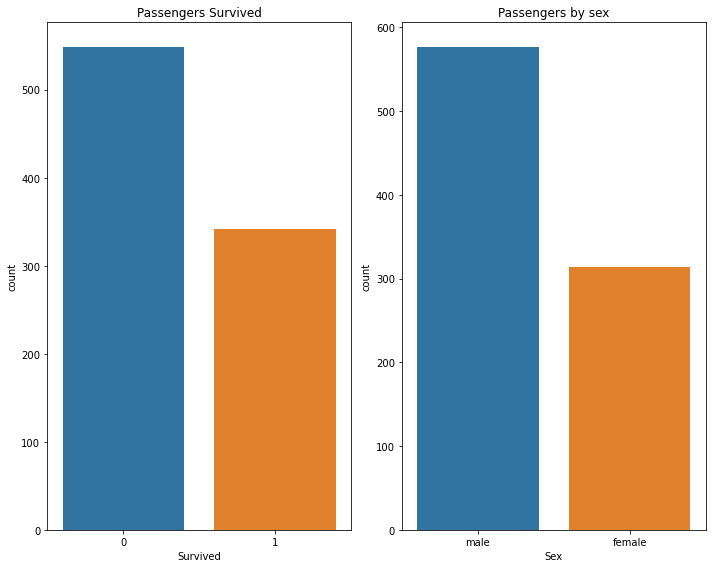

In [8]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
sns.countplot(data=train_data,x='Survived',ax=ax[0])
sns.countplot(data=train_data,x='Sex',ax=ax[1])
ax[0].set_title('Passengers Survived')
ax[1].set_title('Passengers by sex')
plt.tight_layout();

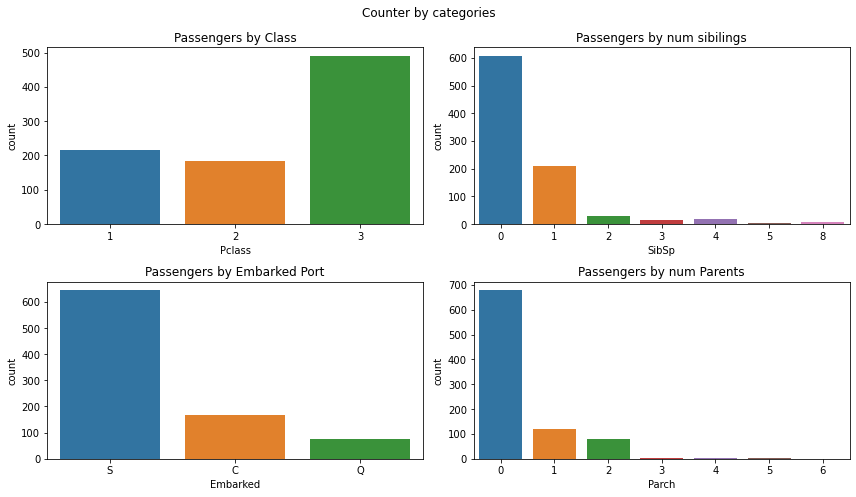

In [9]:
fig,ax = plt.subplots(2,2,figsize=(12,7))
fig.suptitle('Counter by categories')
sns.countplot(data=train_data,x='Pclass',ax=ax[0,0])
sns.countplot(data=train_data,x='Embarked',ax=ax[1,0])
sns.countplot(data=train_data,x='SibSp',ax=ax[0,1])
sns.countplot(data=train_data,x='Parch',ax=ax[1,1])
ax[0,0].set_title('Passengers by Class')
ax[1,0].set_title('Passengers by Embarked Port')
ax[0,1].set_title('Passengers by num sibilings')
ax[1,1].set_title('Passengers by num Parents')

plt.tight_layout();

## Numerical

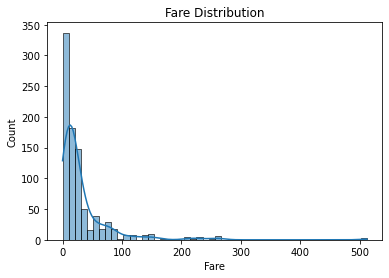

In [10]:
sns.histplot(data=train_data,x='Fare',kde=True,bins=50)
plt.title('Fare Distribution');

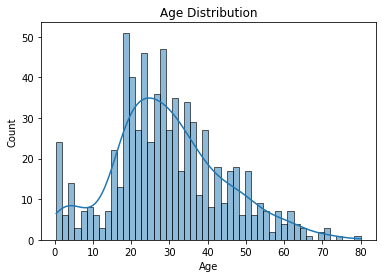

In [11]:
sns.histplot(data=train_data,x='Age',kde=True,bins=50)
plt.title('Age Distribution');

## Variables vs Survived

In [12]:
train_data.groupby('Sex').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

In [13]:
train_data.groupby('Pclass').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

In [14]:
train_data.groupby('SibSp').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

In [15]:
train_data.groupby('Parch').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

In [16]:
train_data.groupby('Embarked').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

## Outliers

## Before outliers

   *   Just drop the most repetitive along the columns (greater than 2)

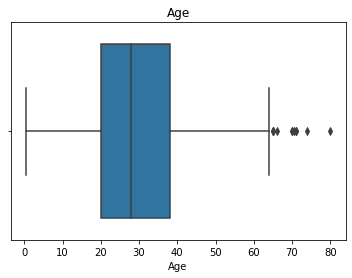

In [17]:
sns.boxplot(data=train_data,x='Age')
plt.title('Age');

In [18]:
q1,q3 = np.nanpercentile(train_data['Age'],[25,75])
IQR = q3 - q1
lim_inferior = q1 - (IQR * 1.5)
lim_superior = q3 + (IQR * 1.5)

In [19]:
print('Lim superior: {0}'.format(lim_superior))
print('Lim inferior: {0}'.format(lim_inferior))
print('IQR: {0}'.format(IQR))
print('Percentil 25: {0}'.format(q1))
print('Percentil 75: {0}'.format(q3))

Lim superior: 64.8125
Lim inferior: -6.6875
IQR: 17.875
Percentil 25: 20.125
Percentil 75: 38.0


In [20]:
#Making a loop
def detecting_outliers(data,features):
    outliers_indices = []
    
    #Selecting the parameters
    for c in features:
        q1,q3= np.nanpercentile(data[c],[25,75])
        IQR = q3 - q1
        lim_inferior = q1 - (IQR * 1.5)
        lim_superior = q3 + (IQR * 1.5)

        #Select outliers indices per column
        outliers_list_col = data[ (data[c] < lim_inferior) | (data[c] > lim_superior)].index
    
        #Collect the column outlier (indices) and add to the list
        outliers_indices.extend(outliers_list_col)
    
    
    outliers_indices = Counter(outliers_indices)    
    multiple_outliers = list(i for i, v in outliers_indices.items() if v > 2)
    
    return multiple_outliers

In [21]:
r = detecting_outliers(train_data,["Age","SibSp","Parch","Fare"])
r

[745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [22]:
train_data.loc[r]

PassengerId  Survived  Pclass                               Name     Sex  \
745          746         0       1       Crosby, Capt. Edward Gifford    male   
27            28         0       1     Fortune, Mr. Charles Alexander    male   
88            89         1       1         Fortune, Miss. Mabel Helen  female   
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
341          342         1       1     Fortune, Miss. Alice Elizabeth  female   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

      Age  SibSp  Parch     Ticket    Fare        Cabin Embarked  
745  70.0      1      1  WE/P 5735   71.00          B22        S  
27   19.0      3      2      19950  263.00  C23 C25 C27        S  
88   23.0      3      2      19950  263.00  C23 C25 C27        S  
159   NaN      8      2   CA. 2343   69.55          NaN        S  
180   NaN      8      2   CA. 2343   69.55          NaN        S  
201   NaN      8      2   CA. 2343   69.55          NaN        S  
324   NaN      8      2   CA. 2343   69.55          NaN        S  
341  24.0      3      2      19950  263.00  C23 C25 C27        S  
792   NaN      8      2   CA. 2343   69.55          NaN        S  
846   NaN      8      2   CA. 2343   69.55          NaN        S  
863   NaN      8      2   CA. 2343   69.55          NaN        S

In [23]:
len(train_data)

891

In [24]:
train_data = train_data.drop(axis=0,labels=r)

In [25]:
len(train_data)

880

*  We´ve just drop the values who appear on 3 out of 4 columns 

## Missing values fot all data (both train and test)

In [26]:
train_data['train_test'] = 1
test_data['train_test'] = 0

all_data = pd.concat([train_data,test_data])

all_data.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  train_test  
0      0         A/5 21171   7.2500   NaN        S           1  
1      0          PC 17599  71.2833   C85        C           1  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3      0            113803  53.1000  C123        S           1  
4      0            373450   8.0500   NaN        S           1

In [27]:
all_data.isnull().sum()[all_data.isnull().sum() > 0].sort_values()

Fare           1
Embarked       2
Age          256
Survived     418
Cabin       1007
dtype: int64

### Null - values for "Embarked"

In [28]:
all_data[all_data['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62       1.0       1                        Icard, Miss. Amelie   
829          830       1.0       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  train_test  
61   female  38.0      0      0  113572  80.0   B28      NaN           1  
829  female  62.0      0      0  113572  80.0   B28      NaN           1

In [29]:
all_data[(all_data['Sex'] == 'female') & (all_data['Age'] >= 30) & (all_data['Pclass'] == 1)]['Embarked'].value_counts()

C    47
S    39
Q     2
Name: Embarked, dtype: int64

In [30]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

###  Null-values for "Fare"

In [31]:
all_data[all_data['Fare'].isnull()]

PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
152         1044       NaN       3  Storey, Mr. Thomas  male  60.5      0   

     Parch Ticket  Fare Cabin Embarked  train_test  
152      0   3701   NaN   NaN        S           0

In [32]:
all_data[(all_data['Embarked'] == 'S') & (all_data['Pclass'] >= 3)]['Fare'].mean().round()

14.0

In [33]:
all_data['Fare'] = all_data['Fare'].fillna(all_data[(all_data['Embarked'] == 'S') & (all_data['Pclass'] >= 3)]['Fare'].mean().round())

## Viz

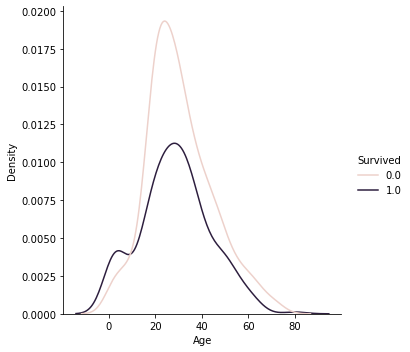

In [34]:
sns.displot(data=all_data,x='Age',hue='Survived',kind='kde')

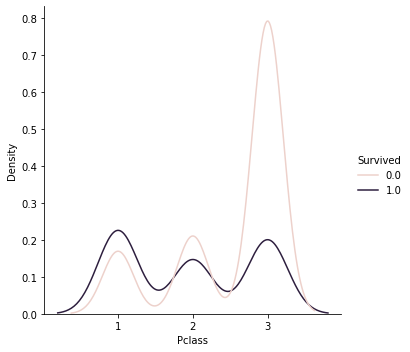

In [35]:
sns.displot(data=all_data,x='Pclass',hue='Survived',kind='kde')
plt.xticks([1,2,3]);

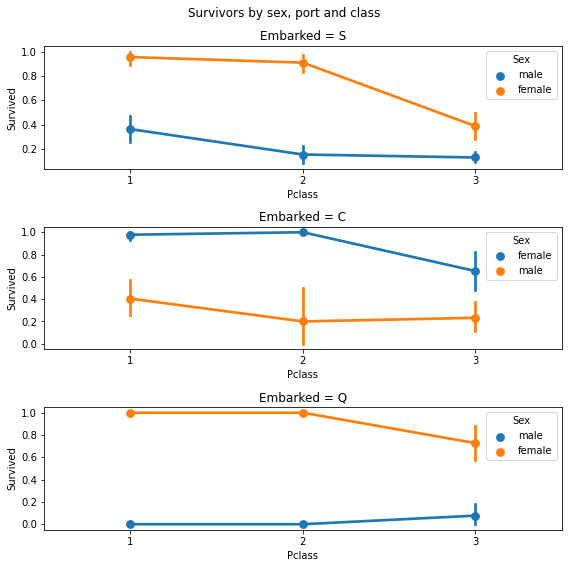

In [36]:
fig,ax = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('Survivors by sex, port and class')
sns.pointplot(data=all_data[all_data['Embarked']=='S'],x='Pclass',y='Survived',hue='Sex',ax=ax[0])
sns.pointplot(data=all_data[all_data['Embarked']=='C'],x='Pclass',y='Survived',hue='Sex',ax=ax[1])
sns.pointplot(data=all_data[all_data['Embarked']=='Q'],x='Pclass',y='Survived',hue='Sex',axax=[2])
ax[0].set_title('Embarked = S')
ax[1].set_title('Embarked = C')
ax[2].set_title('Embarked = Q')
plt.tight_layout();

### Null values for age

### Looking for correlations

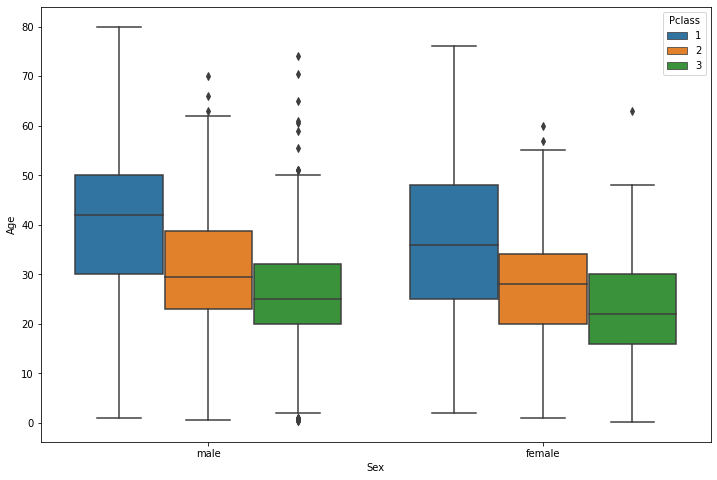

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(data=all_data,x='Sex',y='Age',hue='Pclass');

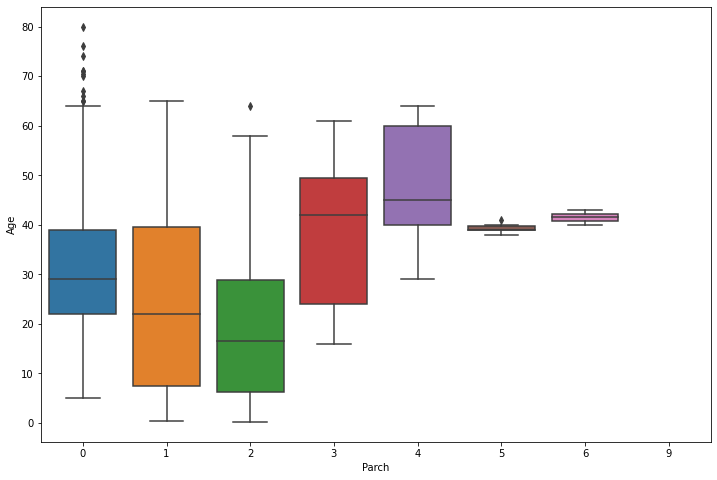

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(data=all_data,x='Parch',y='Age');

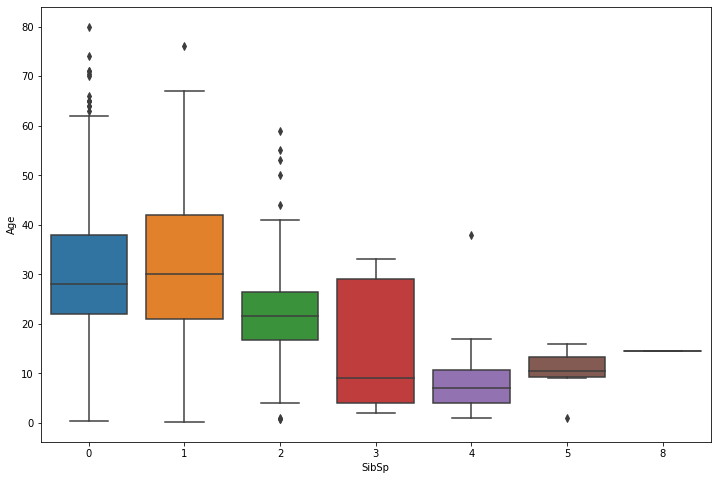

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(data=all_data,x='SibSp',y='Age');

In [40]:
all_data['Sex'] = all_data['Sex'].map({'male':1, 'female':0})

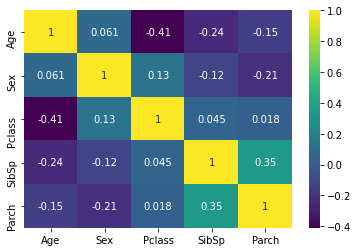

In [41]:
sns.heatmap(data=all_data[['Age','Sex','Pclass','SibSp','Parch']].corr(),cmap='viridis',annot=True);

### Copies from the data to viz the techiniques (from all_data)

In [42]:
copy_mean = all_data.copy()
copy_median = all_data.copy()
copy_loop = all_data.copy()
copy_knn = all_data.copy()

## Age dist by Filled technique

In [ ]:
### How the loop works

#Edad de las personas que tengan los mismos "Sibilings"
data['Age'][(data['Sibilings'] == data.iloc[5]['Sibilings'])]

#Edad de las personas con el mismo valor en "Parents"
data['Age'][(data['Parents'] == data.iloc[5]['Parents'])]

#Edad de las personas con el mismo valor en "P-Class"
data['Age'][(data['Pclass'] == data.iloc[5]['Pclass'])]

In [43]:
#Rows (index from the Nan values on "Age")
# Porque son los más correlacionados con "Age"

#Index de las personas con null-value en "Age"
rows_nan_age = list(copy_loop['Age'][copy_loop['Age'].isnull()].index)


for i in rows_nan_age:
    #Calcular la edad de las personas que tengan los mismos valores en
    # Sibilings, Pclass y Parents
    
    age_pred = copy_loop['Age'][((copy_loop['SibSp'] == copy_loop.iloc[i]['SibSp']) &
                          (copy_loop['Parch'] == copy_loop.iloc[i]['Parch']) &
                          (copy_loop['Pclass'] == copy_loop.iloc[i]['Pclass']))].median()
    
    age_med = copy_loop['Age'].median()
    
    #all_data['Age'].iloc[i] = age_pred
    if not np.isnan(age_pred):
        copy_loop['Age'].loc[i] = age_pred
    else:
        copy_loop['Age'].loc[i] = age_med

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [44]:
copy_mean['Age'] = copy_mean['Age'].fillna(copy_mean['Age'].mean())

copy_median['Age'] = copy_median['Age'].fillna(copy_median['Age'].median())

# Feature Engenieering

## Maybe I can extract more Info from other variables

   *  Also for the last technique for the null values (KNN Inputation)

### Name

In [45]:
copy_knn['Name Title'] = copy_knn['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
copy_knn.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  train_test Name Title  
0         A/5 21171   7.2500   NaN        S           1         Mr  
1          PC 17599  71.2833   C85        C           1        Mrs  
2  STON/O2. 3101282   7.9250   NaN        S           1       Miss  
3            113803  53.1000  C123        S           1        Mrs  
4            373450   8.0500   NaN        S           1         Mr

In [46]:
copy_knn['Name Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Sir               1
Jonkheer          1
the Countess      1
Lady              1
Dona              1
Don               1
Mme               1
Name: Name Title, dtype: int64

In [47]:
#Get the titles (Mr, Miss, Mrs, etc...)
titles = copy_knn['Name Title'].value_counts()[copy_knn['Name Title'].value_counts() < 65].index

#If the value is lower than 40, then we'll grouped on a category named "Other"
copy_knn['Name Title'] = copy_knn['Name Title'].apply(lambda x: 'Other' if x in titles else x)

#See the results
copy_knn['Name Title'].value_counts()

Mr       753
Miss     255
Mrs      197
Other     93
Name: Name Title, dtype: int64

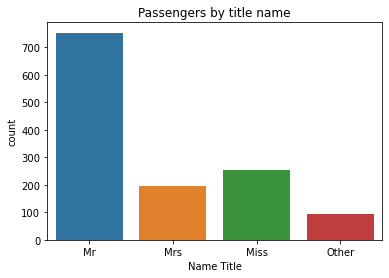

In [48]:
sns.countplot(data=copy_knn,x='Name Title')
plt.title('Passengers by title name');

In [49]:
copy_knn.groupby('Name Title').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

In [50]:
copy_knn.drop('Name',axis=1,inplace=True)

### Ticket

In [51]:
copy_knn['Ticket Numeric'] = copy_knn['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)

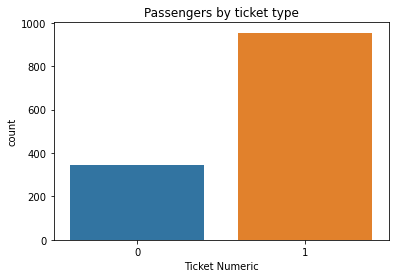

In [52]:
sns.countplot(data=copy_knn, x='Ticket Numeric')
plt.title('Passengers by ticket type');

In [53]:
copy_knn.groupby('Ticket Numeric').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

### Family Size

In [54]:
#We add "+1" because we are counting the actuall row
copy_knn['Fam Size'] = copy_knn['SibSp'] + copy_knn['Parch'] + 1

<AxesSubplot:xlabel='Fam Size', ylabel='count'>

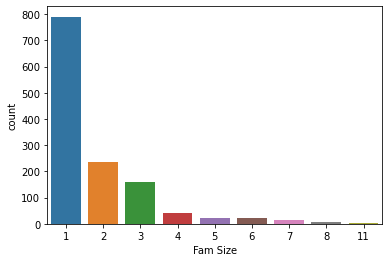

In [55]:
sns.countplot(data=copy_knn,x='Fam Size')

In [56]:
copy_knn.groupby('Fam Size').agg({'Survived':'mean'}).sort_values('Survived',ascending=False).style.format({'Survived':'{:.2f}'})

In [57]:
copy_knn.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1       0.0       3    1  22.0      1      0         A/5 21171   
1            2       1.0       1    0  38.0      1      0          PC 17599   
2            3       1.0       3    0  26.0      0      0  STON/O2. 3101282   
3            4       1.0       1    0  35.0      1      0            113803   
4            5       0.0       3    1  35.0      0      0            373450   

      Fare Cabin Embarked  train_test Name Title  Ticket Numeric  Fam Size  
0   7.2500   NaN        S           1         Mr               0         2  
1  71.2833   C85        C           1        Mrs               0         2  
2   7.9250   NaN        S           1       Miss               0         1  
3  53.1000  C123        S           1        Mrs               1         2  
4   8.0500   NaN        S           1         Mr               1         1

In [58]:
copy_knn.isnull().sum()

PassengerId          0
Survived           418
Pclass               0
Sex                  0
Age                256
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1007
Embarked             0
train_test           0
Name Title           0
Ticket Numeric       0
Fam Size             0
dtype: int64

### Dummie Variables

In [59]:
copy_knn = pd.get_dummies(copy_knn,columns=['Name Title','Embarked'])
copy_knn.drop(['Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [60]:
copy_knn.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  train_test  \
0       0.0       3    1  22.0      1      0   7.2500           1   
1       1.0       1    0  38.0      1      0  71.2833           1   
2       1.0       3    0  26.0      0      0   7.9250           1   
3       1.0       1    0  35.0      1      0  53.1000           1   
4       0.0       3    1  35.0      0      0   8.0500           1   

   Ticket Numeric  Fam Size  Name Title_Miss  Name Title_Mr  Name Title_Mrs  \
0               0         2                0              1               0   
1               0         2                0              0               1   
2               0         1                1              0               0   
3               1         2                0              0               1   
4               1         1                0              1               0   

   Name Title_Other  Embarked_C  Embarked_Q  Embarked_S  
0                 0           0           0           1  
1                 0           1           0           0  
2                 0           0           0           1  
3                 0           0           0           1  
4                 0           0           0           1

In [61]:
copy_knn.isnull().sum()[copy_knn.isnull().sum() > 0]

Survived    418
Age         256
dtype: int64

### KNN Imputer

  * I don´t want to fill both the "Survived" and the "Age" column, later I'll  predict that value
  * I need to select only for 'Age'

In [62]:
copy_knn.loc[:,'Pclass':]

Pclass  Sex   Age  SibSp  Parch      Fare  train_test  Ticket Numeric  \
0         3    1  22.0      1      0    7.2500           1               0   
1         1    0  38.0      1      0   71.2833           1               0   
2         3    0  26.0      0      0    7.9250           1               0   
3         1    0  35.0      1      0   53.1000           1               1   
4         3    1  35.0      0      0    8.0500           1               1   
..      ...  ...   ...    ...    ...       ...         ...             ...   
413       3    1   NaN      0      0    8.0500           0               0   
414       1    0  39.0      0      0  108.9000           0               0   
415       3    1  38.5      0      0    7.2500           0               0   
416       3    1   NaN      0      0    8.0500           0               1   
417       3    1   NaN      1      1   22.3583           0               1   

     Fam Size  Name Title_Miss  Name Title_Mr  Name Title_Mrs  \
0           2                0              1               0   
1           2                0              0               1   
2           1                1              0               0   
3           2                0              0               1   
4           1                0              1               0   
..        ...              ...            ...             ...   
413         1                0              1               0   
414         1                0              0               0   
415         1                0              1               0   
416         1                0              1               0   
417         3                0              0               0   

     Name Title_Other  Embarked_C  Embarked_Q  Embarked_S  
0                   0           0           0           1  
1                   0           1           0           0  
2                   0           0           0           1  
3                   0           0           0           1  
4                   0           0           0           1  
..                ...         ...         ...         ...  
413                 0           0           0           1  
414                 1           1           0           0  
415                 0           0           0           1  
416                 0           0           0           1  
417                 1           1           0           0  

[1298 rows x 16 columns]

In [63]:
from sklearn.impute import KNNImputer
impute_knn =  KNNImputer(n_neighbors=3,missing_values=np.nan)
copy_knn_complete = pd.DataFrame(impute_knn.fit_transform(copy_knn.loc[:,'Pclass':]))
copy_knn_complete.head(10)

0    1          2    3    4        5    6    7    8    9    10   11   12  \
0  3.0  1.0  22.000000  1.0  0.0   7.2500  1.0  0.0  2.0  0.0  1.0  0.0  0.0   
1  1.0  0.0  38.000000  1.0  0.0  71.2833  1.0  0.0  2.0  0.0  0.0  1.0  0.0   
2  3.0  0.0  26.000000  0.0  0.0   7.9250  1.0  0.0  1.0  1.0  0.0  0.0  0.0   
3  1.0  0.0  35.000000  1.0  0.0  53.1000  1.0  1.0  2.0  0.0  0.0  1.0  0.0   
4  3.0  1.0  35.000000  0.0  0.0   8.0500  1.0  1.0  1.0  0.0  1.0  0.0  0.0   
5  3.0  1.0  54.833333  0.0  0.0   8.4583  1.0  1.0  1.0  0.0  1.0  0.0  0.0   
6  1.0  1.0  54.000000  0.0  0.0  51.8625  1.0  1.0  1.0  0.0  1.0  0.0  0.0   
7  3.0  1.0   2.000000  3.0  1.0  21.0750  1.0  1.0  5.0  0.0  0.0  0.0  1.0   
8  3.0  0.0  27.000000  0.0  2.0  11.1333  1.0  1.0  3.0  0.0  0.0  1.0  0.0   
9  2.0  0.0  14.000000  1.0  0.0  30.0708  1.0  1.0  2.0  0.0  0.0  1.0  0.0   

    13   14   15  
0  0.0  0.0  1.0  
1  1.0  0.0  0.0  
2  0.0  0.0  1.0  
3  0.0  0.0  1.0  
4  0.0  0.0  1.0  
5  0.0  1.0  0.0  
6  0.0  0.0  1.0  
7  0.0  0.0  1.0  
8  0.0  0.0  1.0  
9  1.0  0.0  0.0

In [64]:
columns = copy_knn.columns[1:]
indexes_cols = np.linspace(0,len(columns)-1,len(columns)).astype('int64')
col_dict = dict(zip(indexes_cols,columns))
col_dict

{0: 'Pclass',
 1: 'Sex',
 2: 'Age',
 3: 'SibSp',
 4: 'Parch',
 5: 'Fare',
 6: 'train_test',
 7: 'Ticket Numeric',
 8: 'Fam Size',
 9: 'Name Title_Miss',
 10: 'Name Title_Mr',
 11: 'Name Title_Mrs',
 12: 'Name Title_Other',
 13: 'Embarked_C',
 14: 'Embarked_Q',
 15: 'Embarked_S'}

In [65]:
copy_knn_complete.rename(mapper=col_dict,axis=1,inplace=True)
copy_knn_complete.head(10)

Pclass  Sex        Age  SibSp  Parch     Fare  train_test  Ticket Numeric  \
0     3.0  1.0  22.000000    1.0    0.0   7.2500         1.0             0.0   
1     1.0  0.0  38.000000    1.0    0.0  71.2833         1.0             0.0   
2     3.0  0.0  26.000000    0.0    0.0   7.9250         1.0             0.0   
3     1.0  0.0  35.000000    1.0    0.0  53.1000         1.0             1.0   
4     3.0  1.0  35.000000    0.0    0.0   8.0500         1.0             1.0   
5     3.0  1.0  54.833333    0.0    0.0   8.4583         1.0             1.0   
6     1.0  1.0  54.000000    0.0    0.0  51.8625         1.0             1.0   
7     3.0  1.0   2.000000    3.0    1.0  21.0750         1.0             1.0   
8     3.0  0.0  27.000000    0.0    2.0  11.1333         1.0             1.0   
9     2.0  0.0  14.000000    1.0    0.0  30.0708         1.0             1.0   

   Fam Size  Name Title_Miss  Name Title_Mr  Name Title_Mrs  Name Title_Other  \
0       2.0              0.0            1.0             0.0               0.0   
1       2.0              0.0            0.0             1.0               0.0   
2       1.0              1.0            0.0             0.0               0.0   
3       2.0              0.0            0.0             1.0               0.0   
4       1.0              0.0            1.0             0.0               0.0   
5       1.0              0.0            1.0             0.0               0.0   
6       1.0              0.0            1.0             0.0               0.0   
7       5.0              0.0            0.0             0.0               1.0   
8       3.0              0.0            0.0             1.0               0.0   
9       2.0              0.0            0.0             1.0               0.0   

   Embarked_C  Embarked_Q  Embarked_S  
0         0.0         0.0         1.0  
1         1.0         0.0         0.0  
2         0.0         0.0         1.0  
3         0.0         0.0         1.0  
4         0.0         0.0         1.0  
5         0.0         1.0         0.0  
6         0.0         0.0         1.0  
7         0.0         0.0         1.0  
8         0.0         0.0         1.0  
9         1.0         0.0         0.0

##### I already have the values for "age", so I just get into the original set (with the Survived column)

In [66]:
copy_knn['Age'] = copy_knn_complete['Age']
copy_knn.head(10)

Survived  Pclass  Sex        Age  SibSp  Parch     Fare  train_test  \
0       0.0       3    1  22.000000      1      0   7.2500           1   
1       1.0       1    0  38.000000      1      0  71.2833           1   
2       1.0       3    0  26.000000      0      0   7.9250           1   
3       1.0       1    0  35.000000      1      0  53.1000           1   
4       0.0       3    1  35.000000      0      0   8.0500           1   
5       0.0       3    1  54.833333      0      0   8.4583           1   
6       0.0       1    1  54.000000      0      0  51.8625           1   
7       0.0       3    1   2.000000      3      1  21.0750           1   
8       1.0       3    0  27.000000      0      2  11.1333           1   
9       1.0       2    0  14.000000      1      0  30.0708           1   

   Ticket Numeric  Fam Size  Name Title_Miss  Name Title_Mr  Name Title_Mrs  \
0               0         2                0              1               0   
1               0         2                0              0               1   
2               0         1                1              0               0   
3               1         2                0              0               1   
4               1         1                0              1               0   
5               1         1                0              1               0   
6               1         1                0              1               0   
7               1         5                0              0               0   
8               1         3                0              0               1   
9               1         2                0              0               1   

   Name Title_Other  Embarked_C  Embarked_Q  Embarked_S  
0                 0           0           0           1  
1                 0           1           0           0  
2                 0           0           0           1  
3                 0           0           0           1  
4                 0           0           0           1  
5                 0           0           1           0  
6                 0           0           0           1  
7                 1           0           0           1  
8                 0           0           0           1  
9                 0           1           0           0

In [67]:
copy_knn.isnull().sum()[copy_knn.isnull().sum() > 0]

Survived    418
dtype: int64

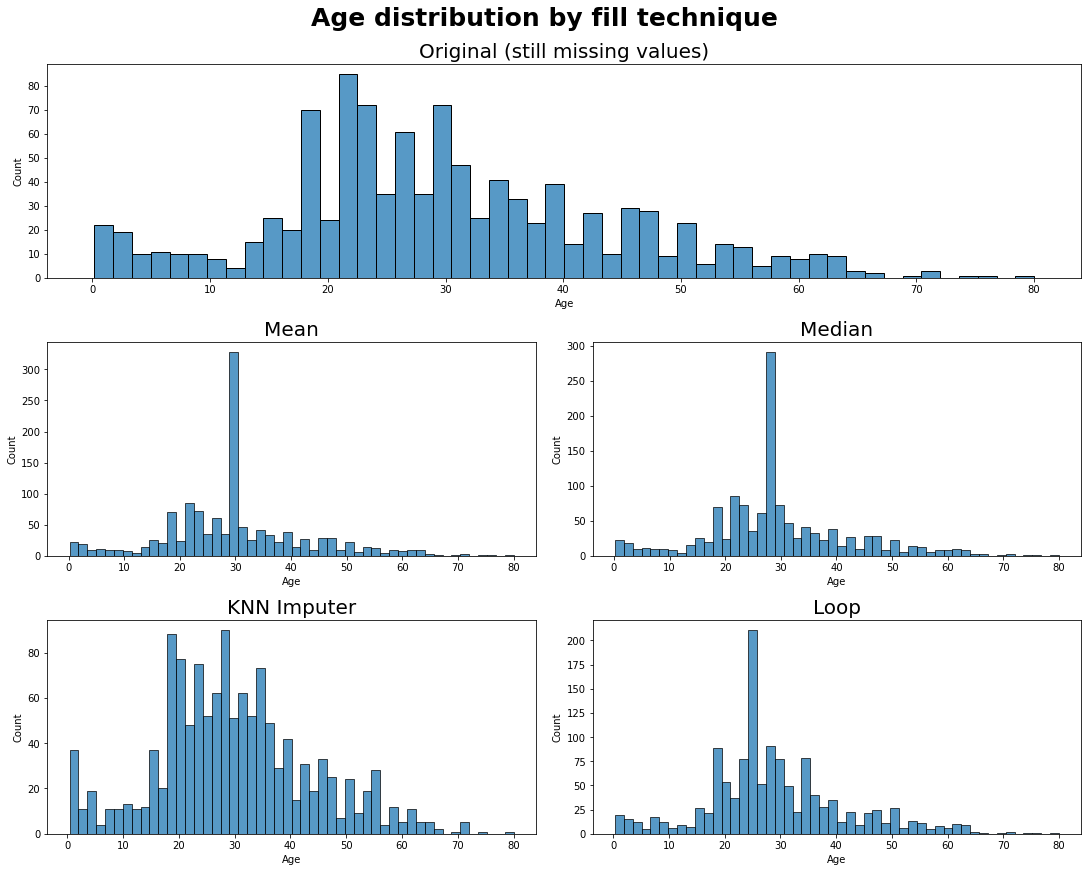

In [68]:
fig = plt.figure(constrained_layout=True,figsize=(15,12))
gs = fig.add_gridspec(3,2)
fig.suptitle('Age distribution by fill technique',fontsize=25,fontweight='bold')

fig_ax1 = fig.add_subplot(gs[0, :])
sns.histplot(data=all_data,x='Age',bins=50,ax=fig_ax1)
fig_ax1.set_title('Original (still missing values)',fontsize=20)


fig_ax2 = fig.add_subplot(gs[1, 1:])
sns.histplot(data=copy_median,x='Age',bins=50,ax=fig_ax2)
fig_ax2.set_title('Median',fontsize=20)

fig_ax3 = fig.add_subplot(gs[1, :1])
sns.histplot(data=copy_mean,x='Age',bins=50,ax=fig_ax3)
fig_ax3.set_title('Mean',fontsize=20)

fig_ax4 = fig.add_subplot(gs[2, 1:])
sns.histplot(data=copy_loop,x='Age',bins=50,ax=fig_ax4)
fig_ax4.set_title('Loop',fontsize=20)

fig_ax5 = fig.add_subplot(gs[2, :1]);
sns.histplot(data=copy_knn,x='Age',bins=50,ax=fig_ax5)
fig_ax5.set_title('KNN Imputer',fontsize=20)

plt.savefig('C:\\Users\\carlo\\Desktop\\Titanic Technique.jpg');

## Split the data

In [69]:
train = copy_knn[copy_knn['train_test'] == 1].drop('train_test',axis=1)
X = train.drop('Survived',axis=1)
y = train['Survived']


test = copy_knn[copy_knn['train_test'] == 0].drop('train_test',axis=1)
test.drop('Survived',axis=1,inplace=True)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling the data

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

# GridModel Log

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [79]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

log_model2 = LogisticRegression(solver='saga', max_iter=10000)
param_grid2 = {'penalty':penalty, 'l1_ratio':l1_ratio, 'C':C}

In [80]:
grid_model2 = GridSearchCV(estimator=log_model2, param_grid=param_grid2,
                         cv=10,verbose=2)

In [81]:
grid_model2.fit(X_train, y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits
[CV] C=1.0, l1_ratio=0.0, penalty=l1 .................................
[CV] .................. C=1.0, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.0, penalty=l1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.0, penalty=l1 .................................
[CV] .................. C=1.0, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.0, penalty=l1 .................................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.0, penalty=l1 .................................
[CV] .................. C=1.0, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.0, penalty=l1 .................................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.0, penalty=l1 .................................
[CV] .................. C=1.0, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.0, penalty=l1 .................................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=0.0, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.0, penalty=l1 .................................
[CV] .................. C=1.0, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.0, penalty=l1 .................................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=0.0, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=0.0, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.0, penalty=l2 .................................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=0.0, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.0, penalty=l2 .................................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=0.0, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=0.0, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.0, penalty=elasticnet .........................
[CV] .......... C=1.0, l1_ratio=0.0, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.0, penalty=elasticnet .........................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .......... C=1.0, l1_ratio=0.0, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.0, penalty=elasticnet .........................
[CV] .......... C=1.0, l1_ratio=0.0, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.0, penalty=elasticnet .........................
[CV] .......... C=1.0, l1_ratio=0.0, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.0, penalty=elasticnet .........................
[CV] .......... C=1.0, l1_ratio=0.0, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.0, penalty=elasticnet .........................
[CV] .......... C=1.0, l1_ratio=0.0, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.0, penalty=elasticnet .........................
[CV] .......... C=1.0, l1_ratio=0.0, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.0, penalty=elasticnet .........................
[CV] .......... C=1.0, l1_ratio=0.0, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.0, penalty=elasticnet .........................
[CV] .

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.3s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.3s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l2 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l2 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.052631578947

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l2 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=l2 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.10526315789473684,

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.3s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.3s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.0s


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV]  C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.157894736842

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l1, total=   0.0s


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l1, total=   0.0s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l1, total=   0.0s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l2 .................
[CV] .

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.21052631578947367, penal

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l2 ..................
[CV] .

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.1s

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))



[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.2631578947368421, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.2631578947368421, pena

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=l2 ..................
[CV] .

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV]  C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.0s
[CV] C=1.0, l1_ratio=0.3157894736842105, p

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet ..........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.3684210526315789, p

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.3s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.3s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.3s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l2 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l2 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=l2 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV] .. C=1.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.42105263157894735,

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l1 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l1 .................
[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l2 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l2 .................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=l2 .................
[CV] .. C=1.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet .........
[CV]  C=1.0, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.473684210526

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.5263157894736842, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet ..........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.5789473684210527, p

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l1 ...................
[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l1 ...................
[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l1 ...................
[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l1 ...................
[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l1 ...................
[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l1 ...................
[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV] .... C=1.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet ...........
[CV]  C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet ...........
[CV]  C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet ...........
[CV]  C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet ...........
[CV]  C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet ...........
[CV]  C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet ...........
[CV]  C=1.0, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.631578947368421, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.3s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.3s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet ..........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.6842105263157894, p

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.7368421052631579, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet ..........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.7894736842105263, p

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.8421052631578947, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l1 ...................
[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l1 ...................
[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l1 ...................
[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l1 ...................
[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=l2 ...................
[CV] .... C=1.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet ...........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet ...........
[CV]  C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet ...........
[CV]  C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet ...........
[CV]  C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet ...........
[CV]  C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet ...........
[CV]  C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet ...........
[CV]  C=1.0, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.894736842105263, penalty=e

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l1 ..................
[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=l2 ..................
[CV] ... C=1.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.1s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet ..........
[CV]  C=1.0, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=0.9473684210526315, penalty=ela

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=1.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=1.0, penalty=l1 .................................
[CV] .................. C=1.0, l1_ratio=1.0, penalty=l1, total=   0.1s
[CV] C=1.0, l1_ratio=1.0, penalty=l1 .................................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=1.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=1.0, penalty=l1 .................................
[CV] .................. C=1.0, l1_ratio=1.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=1.0, penalty=l1 .................................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=1.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=1.0, penalty=l1 .................................
[CV] .................. C=1.0, l1_ratio=1.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=1.0, penalty=l1 .................................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=1.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=1.0, penalty=l1 .................................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=1.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=1.0, penalty=l1 .................................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=1.0, penalty=l1, total=   0.2s
[CV] C=1.0, l1_ratio=1.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=1.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=1.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=1.0, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=1.0, penalty=l2 .................................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV] .................. C=1.0, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=1.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=1.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=1.0, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=1.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=1.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=1.0, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=1.0, penalty=l2 .................................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .................. C=1.0, l1_ratio=1.0, penalty=l2, total=   0.0s
[CV] C=1.0, l1_ratio=1.0, penalty=l2 .................................
[CV] .................. C=1.0, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=1.0, l1_ratio=1.0, penalty=elasticnet .........................
[CV] .......... C=1.0, l1_ratio=1.0, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=1.0, penalty=elasticnet .........................
[CV] .......... C=1.0, l1_ratio=1.0, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=1.0, penalty=elasticnet .........................
[CV] .......... C=1.0, l1_ratio=1.0, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=1.0, penalty=elasticnet .........................
[CV] .......... C=1.0, l1_ratio=1.0, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=1.0, penalty=elasticnet .........................
[CV] .......... C=1.0, l1_ratio=1.0, penalty=elasticnet, total=   0.2s
[CV] C=1.0, l1_ratio=1.0, penalty=elasticnet .........................
[CV] .

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l1 ..................
[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l1 ..................
[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l1 ..................
[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l2 ..................
[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l2 ..................
[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l2 ..................
[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l2 ..................
[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l2 ..................
[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=0.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.10526315789473684, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.15789473684210525, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1, total=   0.4s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1, total=   0.4s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l1, total=   0.4s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2, total=   0.1s


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.21052631578947367, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1, total=   0.4s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=3.359818286

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1, total=   0.4s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l1, total=   0.4s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.42105263157894735, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1 ..
[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2 ..
[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.47368421052631576, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet 


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5263157894736842, penalty=elasticnet

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1 ....
[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1 ....
[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1 ....
[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2 ....
[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2 ....
[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2 ....
[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2 ....
[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2 ....
[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=3.35981828

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet 


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.6842105263157894, penalty=elasticnet

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\lin

[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=l2, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.0s
[CV] C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=3.359818286

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1 ....
[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1 ....
[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1 ....
[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2 ....
[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2 ....
[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2 ....
[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2 ....
[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2 ....
[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=3.35981828

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1 ...
[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1, total=   0.4s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2 ...
[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=3.359818286

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l1 ..................
[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l1 ..................
[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l1, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l1 ..................
[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l1, total=   0.4s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l1, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l1, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l2 ..................
[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l2 ..................
[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l2 ..................
[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l2 ..................
[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l2 ..................
[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=3.3598182862837818, l1_ratio=1.0, penalty=l2, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet, total=   0.3s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet, total=   0.2s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=3.3598182862837818, l1_ratio=1.0, penalty=elasticnet, total=   0.1s
[CV] C=3.3598182862837818, l1_ratio=1.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l1, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l1 ...................
[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l1 ...................
[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l1 ...................
[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l1, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l1, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l1 ...................
[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l1, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l2 ...................
[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l2 ...................
[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l2 ...................
[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=0.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=11.28837891684689, l1_ratio=0.0, penalty=elasticnet, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet 


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.05263157894736842, penalty=elasticnet

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l1, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=l2, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.1s
[CV] C=11.28837891684689, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet 


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.21052631578947367, penalty=elasticnet

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=11.2883789

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=11.2883789

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet 


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=11

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2 ...
[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2, total=   0.2s


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet 


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=11

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet 


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=11

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2 .....
[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2 .....
[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet 


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=11.28837891684

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=11.2883789

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=11.2883789

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=11.2883789

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=11.2883789

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2 .....
[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2 .....
[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2, total=   0.2s


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2 .....
[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet 


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=11.28837891684

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1, total=   0.6s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2 ....
[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.7s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=11.2883789

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l1, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l1, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l1, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l2 ...................
[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l2 ...................
[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l2 ...................
[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l2 ...................
[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l2 ...................
[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=11.28837891684689, l1_ratio=1.0, penalty=l2, total=   0.2s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet, total=   0.5s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet, total=   0.3s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=11.28837891684689, l1_ratio=1.0, penalty=elasticnet, total=   0.4s
[CV] C=11.28837891684689, l1_ratio=1.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=0.0, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=37.926901907322495, l1_ratio=0.0, penalty=elasticnet, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.05263157894736842, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.10526315789473684, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1, total=   1.1s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.15789473684210525, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.21052631578947367, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=37.9269019

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=37.9269019

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.0s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l1, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l1, total=   0.6s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l2, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l2 ..................
[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l2, total=   0.3s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=37.926901907322495, l1_ratio=1.0, penalty=l2, total=   0.4s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet, total=   0.5s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet, total=   1.1s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=37.926901907322495, l1_ratio=1.0, penalty=elasticnet, total=   0.7s
[CV] C=37.926901907322495, l1_ratio=1.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=127.42749857031335, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.05263157894736842, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.10526315789473684, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.15789473684210525, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.0s
[CV] C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.42105263157894735, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.47368421052631576, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l1, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=127.427498

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l1, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l1, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l1, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=127.427498

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l1, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l1, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l1, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l2, total=   0.4s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l2, total=   0.5s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=127.42749857031335, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet, total=   0.6s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet, total=   0.7s
[CV] C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=127.42749857031335, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=127.42749857031335, l1_ratio=1.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=0.0, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.1s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.1s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.1s
[CV] C=428.1332398719391, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1, total=   1.1s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1 ...
[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2, total=   0.4s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=428.133239

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1, total=   1.1s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.1s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.1s
[CV] C=428.1332398719391, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=428.133239

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1, total=   1.1s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=428.133239

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=428.133239

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=428.133239

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=428.133239

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=428.133239

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=l2, total=   0.5s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=428.133239

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.1s
[CV] C=428.1332398719391, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=428.133239

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=428.133239

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l1, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=428.1332398719391, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet, total=   0.7s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=428.1332398719391, l1_ratio=1.0, penalty=elasticnet, total=   1.1s
[CV] C=428.1332398719391, l1_ratio=1.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l1, total=   1.2s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l2, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l2 ...................
[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=1438.449888287663, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1, total=   1.2s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1, total=   1.2s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1, total=   1.2s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1, total=   1.3s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1 ...
[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1, total=   1.2s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=1438.44988

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1, total=   1.2s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=1438.44988

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=1438.44988

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=1438.44988

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=1438.44988

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=1438.44988

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=1438.44988

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1 ....
[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=l2, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.2s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=1438.44988

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=1438.44988

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2, total=   0.2s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=l2, total=   0.2s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1, total=76.8min
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1, total=   0.4s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1, total=   0.3s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1, total=   0.5s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1, total=   0.3s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l1, total=   0.2s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2, total=   0.3s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.3s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.5s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=1438.44988

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l1, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=1438.449888287663, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet, total=   1.1s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=1438.449888287663, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=1438.449888287663, l1_ratio=1.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=4832.930238571752, l1_ratio=0.0, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.2s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.2s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1, total=   1.2s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=4832.93023

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=4832.93023

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1, total=   1.2s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2, total=   0.5s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=4832.93023

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1, total=   1.2s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   1.2s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=4832.93023

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=4832.93023

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=4832.93023

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=4832.93023

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=4832.93023

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=4832.93023

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=4832.93023

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=4832.930238571752, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet, total=   0.7s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet, total=   1.0s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=4832.930238571752, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=4832.930238571752, l1_ratio=1.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l1, total=   1.2s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l2, total=   0.4s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=0.0, penalty=l2, total=   0.2s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=16237.76739188721, l1_ratio=0.0, penalty=elasticnet, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.2s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=16237.7673

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=16237.7673

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=16237.7673

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=16237.7673

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=16237.7673

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.2s
[CV] C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1, total=   1.2s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=16237.7673

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=16237.7673

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=16237.7673

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=16237.7673

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.1s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=16237.7673

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l1, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=16237.76739188721, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=16237.76739188721, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=16237.76739188721, l1_ratio=1.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l1, total=   1.2s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l1, total=   1.2s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=54555.947811685146, l1_ratio=0.0, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.05263157894736842, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.10526315789473684, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.15789473684210525, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.21052631578947367, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1, total=   1.2s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1, total=   1.3s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1, total=   1.2s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.47368421052631576, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=54555.9478

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.2s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=54555.9478

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l1, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.0s
[CV] C=54555.947811685146, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=54555.947811685146, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=54555.947811685146, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=54555.947811685146, l1_ratio=1.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=183298.07108324338, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1, total=   1.2s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.2s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.2s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.05263157894736842, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.10526315789473684, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.21052631578947367, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1, total=   1.2s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l1, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l1, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.42105263157894735, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l1, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.47368421052631576, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l1, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=183298.071

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l1, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1, total=   1.3s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1, total=   1.3s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1, total=   1.2s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1, total=   1.3s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l1, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2, total=   1.0s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=183298.071

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1, total=   1.2s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=183298.07108324338, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=183298.07108324338, l1_ratio=1.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l2, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=615848.2110660254, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1, total=   1.2s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1, total=   1.2s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1, total=   1.2s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1, total=   1.3s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=615848.211

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=615848.211

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=615848.211

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=615848.211

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=615848.211

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=615848.211

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=615848.211

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=615848.211

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.2s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.2s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.2s
[CV] C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=615848.211

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1, total=   1.2s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=615848.211

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=615848.2110660254, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet, total=   1.0s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=615848.2110660254, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=615848.2110660254, l1_ratio=1.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=2069138.0811147902, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.05263157894736842, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.10526315789473684, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.2s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.15789473684210525, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.21052631578947367, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.42105263157894735, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1 ..
[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.47368421052631576, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.3s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.2s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1, total=   1.2s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=2069138.08

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.2s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.2s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.3s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=2069138.08

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2069138.0811147902, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet, total=   1.0s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=2069138.0811147902, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=2069138.0811147902, l1_ratio=1.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=0.0, penalty=l2, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=6951927.961775606, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1, total=   1.2s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2, total=   1.2s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.2s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.2s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.2s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=6951927.96

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=6951927.96

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=6951927.96

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.2s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=6951927.96

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1, total=   1.2s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1, total=   1.3s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=6951927.96

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=l2, total=   0.5s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1, total=   1.2s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=6951927.96

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1 ....
[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=6951927.96

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=6951927.96

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=6951927.96

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1, total=   1.2s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1, total=   1.3s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=6951927.96

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=6951927.961775606, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=6951927.961775606, l1_ratio=1.0, penalty=elasticnet, total=   1.1s
[CV] C=6951927.961775606, l1_ratio=1.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=23357214.690901212, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.05263157894736842, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.10526315789473684, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.3s
[CV] C=23357214.690901212, l1_ratio=0.15789473684210525, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.21052631578947367, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1, total=   1.3s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1, total=   1.3s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.42105263157894735, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.47368421052631576, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1, total=   1.4s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.3s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=23357214.6

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2 ...
[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=23357214.6

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1, total=   1.3s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1, total=   1.3s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1, total=   1.2s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=23357214.690901212, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet, total=   1.1s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet, total=   1.0s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=23357214.690901212, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=23357214.690901212, l1_ratio=1.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=78475997.03514607, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=78475997.0

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=78475997.0

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=78475997.0

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=78475997.0

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1, total=   1.3s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1, total=   1.3s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=78475997.0

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2, total=   0.5s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2, total=   0.5s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2, total=   0.5s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2, total=   0.5s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=l2, total=   0.5s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.6s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=78475997.0

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=78475997.0

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=78475997.0

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.3s
[CV] C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=78475997.0

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1, total=   1.4s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.3s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.4s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.3s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.4s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.3s
[CV] C=78475997.03514607, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1, total=   1.3s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1, total=   1.3s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.3s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.3s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.3s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=78475997.0

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l1, total=   1.2s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=78475997.03514607, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet, total=   1.0s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=78475997.03514607, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=78475997.03514607, l1_ratio=1.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=263665089.87303555, l1_ratio=0.0, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1, total=   1.3s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2 ..
[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.4s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.10526315789473684, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.15789473684210525, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.21052631578947367, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.42105263157894735, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.47368421052631576, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1, total=   1.3s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1, total=   1.3s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=263665089.

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=263665089.

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l1, total=   1.4s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l2, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=263665089.87303555, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet, total=   1.2s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet, total=   1.1s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet, total=   1.0s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=263665089.87303555, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=263665089.87303555, l1_ratio=1.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l2, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet ...........
[CV]  C=885866790.4100832, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1, total=   1.2s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.2s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1, total=   1.2s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1, total=   1.2s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=885866790.

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.2s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=885866790.

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1, total=   1.2s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1, total=   1.2s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.2s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.2s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=885866790.

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=885866790.

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=885866790.

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.2s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=885866790.

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1, total=   1.2s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1, total=   1.4s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=885866790.

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=885866790.

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1, total=   1.2s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=885866790.

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2 .....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=885866790.

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l1 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=l2 ...................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] .... C=885866790.4100832, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet ...........
[CV]  C=885866790.4100832, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=885866790.4100832, l1_ratio=1.0, penalty=elast

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=0.0, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet ..........
[CV]  C=2976351441.6313133, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.05263157894736842, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.10526315789473684, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.15789473684210525, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.21052631578947367, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.42105263157894735, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2 ..


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.47368421052631576, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1, total=   1.4s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1, total=   1.5s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l1, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.631578947368421, penalty=elasticnet 
[CV]  C=2976351441

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1, total=   1.4s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1, total=   1.5s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l1, total=   1.3s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2 ....


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.894736842105263, penalty=elasticnet 
[CV]  C=2976351441

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2 ...


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l1, total=   1.2s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l1 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l2, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=l2 ..................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ... C=2976351441.6313133, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet ..........
[CV]  C=2976351441.6313133, l1_ratio=1.0, penalty=elasticnet, total=   1.1s
[CV] C=2976351441.6313133, l1_ratio=1.0, penalt

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l1, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l1, total=   1.3s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=0.0, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=elasticnet ...............
[CV]  C=10000000000.0, l1_ratio=0.0, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=elasticnet ...............
[CV]  C=10000000000.0, l1_ratio=0.0, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=elasticnet ...............
[CV]  C=10000000000.0, l1_ratio=0.0, penalty=elasticnet, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=elasticnet ...............
[CV]  C=10000000000.0, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=elasticnet ...............
[CV]  C=10000000000.0, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=elasticnet ...............
[CV]  C=10000000000.0, l1_ratio=0.0, penalty=elasticnet, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.0, penalty=elasticnet ...............
[CV]  

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.05263157894736842, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.05263157894736842, p

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.10526315789473684, p

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.15789473684210525, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.15789473684210525, p

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l1, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.21052631578947367, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.21052631578947367, p

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.2631578947368421, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.3157894736842105, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.3684210526315789, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.42105263157894735, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.42105263157894735, p

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2 .......


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.47368421052631576, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.47368421052631576, p

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.5263157894736842, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.5789473684210527, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1, total=   1.2s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1, total=   1.3s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet .
[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet .
[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet .
[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet .
[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet .
[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet .
[CV]  C=10000000000.0, l1_ratio=0.631578947368421, penalty=elasticnet, t

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.6842105263157894, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.7368421052631579, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.7894736842105263, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.8421052631578947, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2 .........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet .
[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet .
[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet .
[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet .
[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet .
[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet .
[CV]  C=10000000000.0, l1_ratio=0.894736842105263, penalty=elasticnet, t

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.9s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2 ........


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasticnet 
[CV]  C=10000000000.0, l1_ratio=0.9473684210526315, penalty=elasti

C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l1, total=   0.9s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l1, total=   1.0s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l1, total=   1.1s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l1 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l1, total=   0.8s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l2, total=   0.7s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l2, total=   0.8s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=l2 .......................


C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV] ........ C=10000000000.0, l1_ratio=1.0, penalty=l2, total=   0.6s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=elasticnet ...............
[CV]  C=10000000000.0, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=elasticnet ...............
[CV]  C=10000000000.0, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=elasticnet ...............
[CV]  C=10000000000.0, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=elasticnet ...............
[CV]  C=10000000000.0, l1_ratio=1.0, penalty=elasticnet, total=   0.9s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=elasticnet ...............
[CV]  C=10000000000.0, l1_ratio=1.0, penalty=elasticnet, total=   1.0s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=elasticnet ...............
[CV]  C=10000000000.0, l1_ratio=1.0, penalty=elasticnet, total=   0.8s
[CV] C=10000000000.0, l1_ratio=1.0, penalty=elasticnet ...............
[CV]  

[Parallel(n_jobs=1)]: Done 12000 out of 12000 | elapsed: 217.6min finished
C:\Users\carlo\anaconda3\envs\Course_DS_ML\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=2)

In [82]:
grid_model2.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [83]:
y_preds = grid_model2.predict(X_test)

In [86]:
accuracy_score(y_test,y_preds)* 100

78.4090909090909

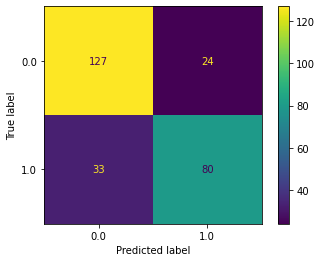

In [87]:
plot_confusion_matrix(grid_model2,X_test,y_test)

In [249]:
test_survived = pd.Series(grid_model2.predict(test),name='Survived').astype('int64')
results = pd.concat([test_passengerid,test_survived],axis=1)
results.to_csv('titanic.csv',index=False)